In [3]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Variables

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [9]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [10]:
df2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Name

In [55]:
df.Name.nunique()

11562

Not every one is unique, check to see what the duplicates look like

In [56]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [8]:
df2.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

These are the games that have versions across multiple platforms.

## Platform

In [9]:
data = [go.Histogram(x=df2.Platform)]
py.iplot(data, filename='Platform Frequency')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sherry9788/0 or inside your plot.ly account where it is named 'Platform Frequency'


In [57]:
platform = df2.Platform.value_counts()
print(platform)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64


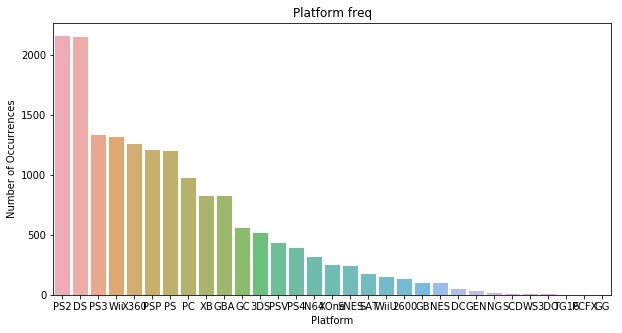

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

## Genre

In [12]:
df2.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [76]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


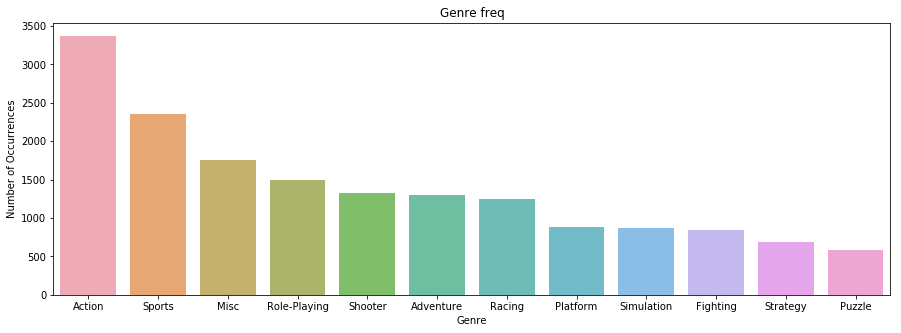

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

## Publisher

In [15]:
df2.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',


In [40]:
len(df2.Publisher.unique())

262

In [ ]:
df2.Publisher.value_counts().iloc[:40]

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(df2.Publisher, order=df2.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Year of Release

In [58]:
np.sort(df2.Year_of_Release.unique())

array([1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

In [18]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

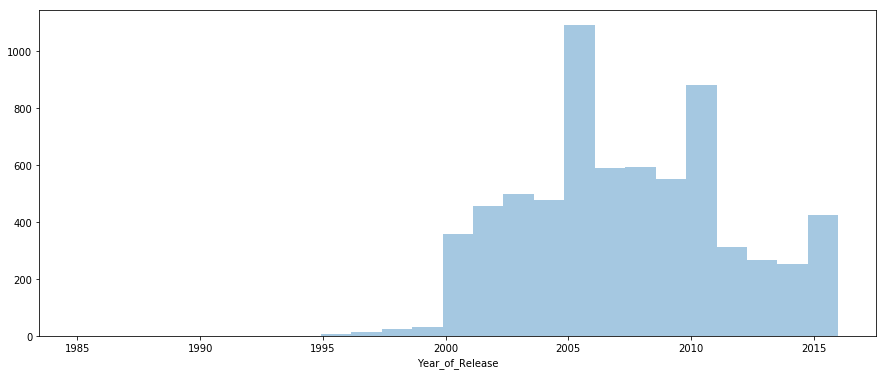

In [44]:
plt.figure(figsize=(15, 6))
sns.distplot(df2.Year_of_Release, kde = False, bins=df2.Year_of_Release.nunique())

## Critic_Score, Critic_Count, User_Score, User_Count

In [37]:
df2.User_Score.unique()

array([8. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 9.3, 6.2, 4.2, 6. , 4.9, 3.7, 4.1, 5.8, 5.6, 5.5,
       4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.5, 5.1, 3.5, 2.5, 1.9,
       2.2, 2. , 9.5, 4.7, 2.1, 3.6, 1.8, 3.8, 3. , 9.6, 2.8, 1.7, 2.7,
       2.4, 1.5, 1.2, 2.3, 0.5, 0.6, 0.9, 1. , 1.4, 1.3, 0.7])

In [21]:
df2.User_Score = df2.User_Score.astype(float)
print(df2.User_Score.max())
print(df2.User_Score.min())

9.6
0.5


In [22]:
df2.User_Count = df2.User_Count.astype(int)
print(df2.User_Count.max())
print(df2.User_Count.min())

10665
4


In [23]:
df2.Critic_Score = df2.Critic_Score.astype(float)
print(df2.Critic_Score.max())
print(df2.Critic_Score.min())

98.0
13.0


In [24]:
df2.Critic_Count = df2.Critic_Count.astype(int)
print(df2.Critic_Count.max())
print(df2.Critic_Count.min())

113
3


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



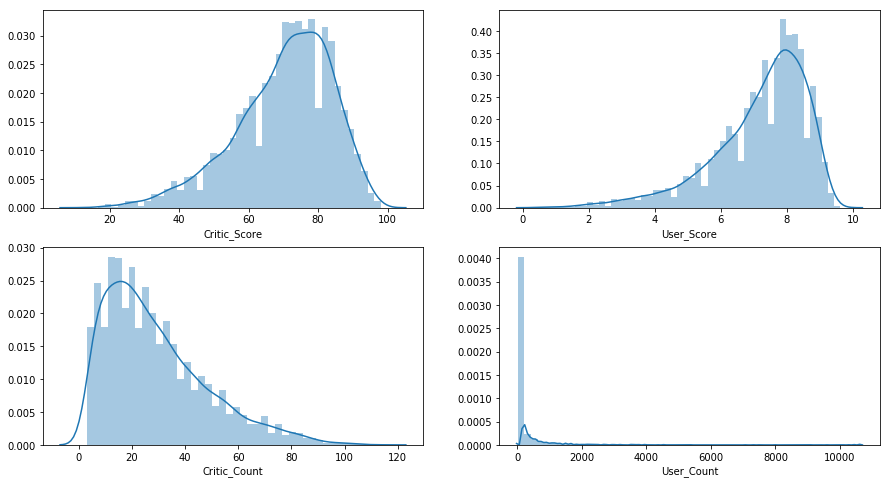

In [60]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df2.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df2.User_Score)

plt.subplot(2,2,3)
sns.distplot(df2.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df2.User_Count)

## Developer

In [45]:
df2.Developer.unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Fluid Studios', 'Atomic Games'], dtype=object)

In [46]:
len(df2.Developer.unique())

1289

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

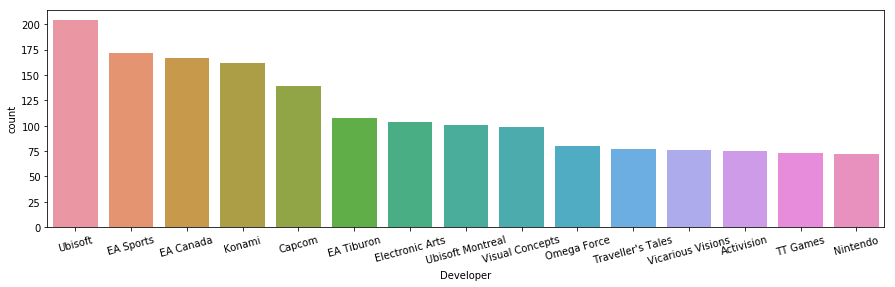

In [62]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

In [47]:
sony_studio = df2.loc[(df2.Publisher.isna()==False) & (df2.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

SCEA San Diego Studios    25
SCE Japan Studio          17
SCEA                      14
Namco                     12
989 Sports                12
SCEE London Studio        12
Naughty Dog               10
Zipper Interactive         8
Clap Hanz                  7
SCEE                       7
Name: Developer, dtype: int64


In [28]:
len(sony_studio)

132

## Rating

In [29]:
np.sort(df2.Rating.unique())

array(['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [48]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64


In [51]:
df2.loc[df2.Rating=='K-A', 'Rating'] = 'E' 

In [52]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2083
M       1433
E10+     930
AO         1
RP         1
Name: Rating, dtype: int64


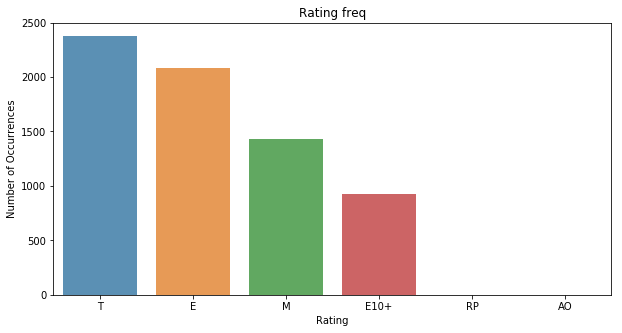

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

In [ ]:
## NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [ ]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

In [ ]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

## Exploratory Analysis of the Data

In [11]:
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Genres

### 1. Distribution of Critic Scores by the Genre of Games

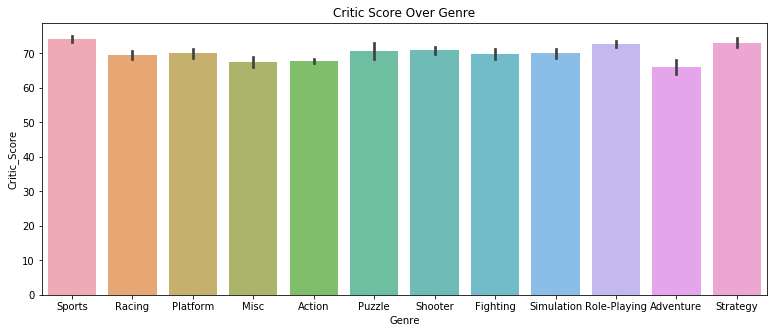

In [87]:
plt.figure(figsize=(13,5))
sns.barplot(df2.Genre, df2.Critic_Score, alpha=0.8)
plt.title("Critic Score Over Genre")
plt.show()

There is not a big difference across different genres in terms of Critics' ratings. It seems that the genres of Sports, Strategy, and Role-Playing are slightly better than the rest.

### 2. User score Over Genre

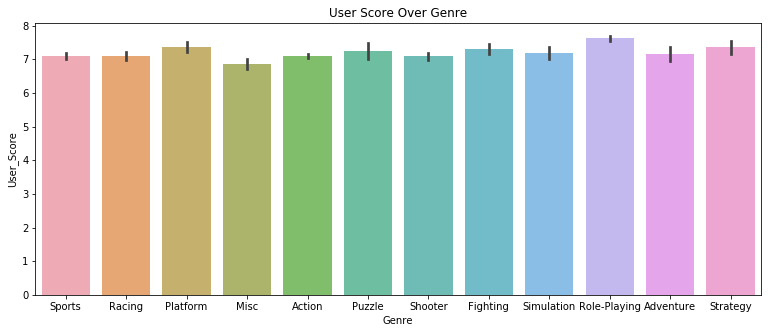

In [84]:
plt.figure(figsize=(13,5))
sns.barplot(df2.Genre, df2.User_Score.astype(float), alpha=0.8)
plt.title("User Score Over Genre")
plt.show()

There is not a big difference across different genres in terms of user scores. It seems that the genres of Role-Playing is doing slightly better than the rest.

### 3. Number of Releases over Genre

In [13]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


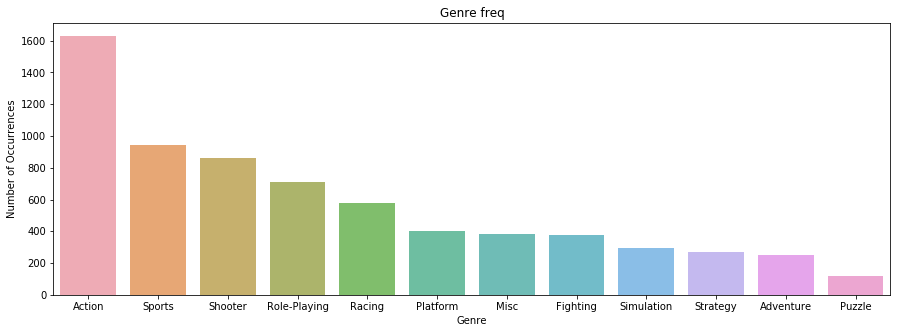

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

The genre of Action has largest number of releases and the genre of Puzzle has the smallest number of releases.

### 4. Total Sales over Genre

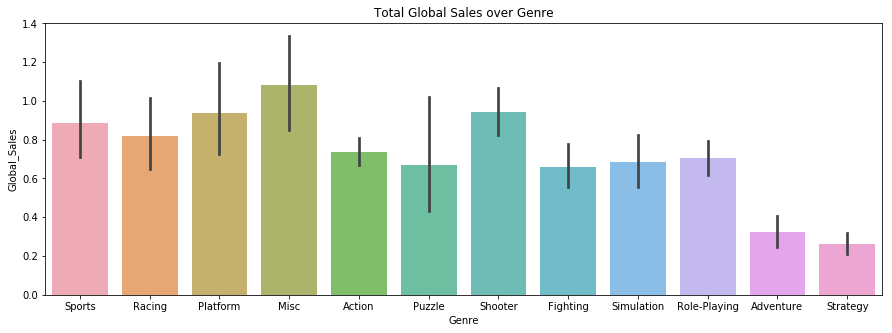

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(df2.Genre, df2.Global_Sales, alpha=0.8)
plt.title("Total Global Sales over Genre")
plt.show()

The genre of Misc has highest global sales and the genre of Strategy has the lowest glocal sales.

### 5. Sales of Different Regions Over Genre

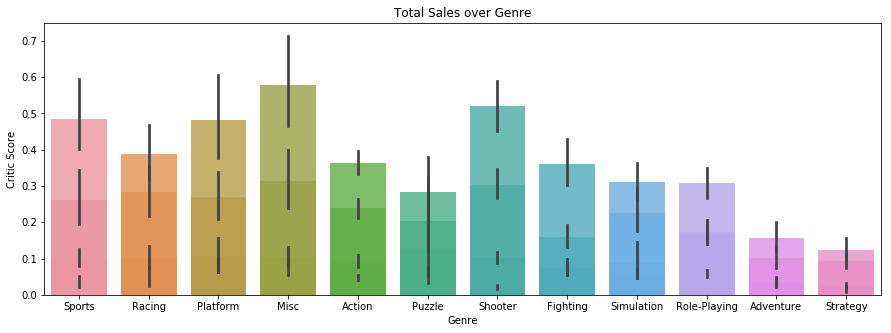

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(df2.Genre, df2.NA_Sales, alpha=0.8)
sns.barplot(df2.Genre, df2.EU_Sales, alpha=0.8)
sns.barplot(df2.Genre, df2.JP_Sales, alpha=0.8)
sns.barplot(df2.Genre, df2.Other_Sales, alpha=0.8)
plt.title("Total Sales over Genre")
plt.ylabel('Critic Score')
plt.xlabel('Genre')
plt.show()

In [40]:
df2_GenreSales = df2[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df2_GenreSales = pd.melt(df2_GenreSales, id_vars="Genre", var_name="Sales_Area", value_name="Sales_Values")
df2_GenreSales.head()

,Genre,Sales_Area,Sales_Values
0,Sports,NA_Sales,41.36
1,Racing,NA_Sales,15.68
2,Sports,NA_Sales,15.61
3,Platform,NA_Sales,11.28
4,Misc,NA_Sales,13.96


In [43]:
df2_NA = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "NA_Sales"]
df2_EU = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "EU_Sales"]
df2_JP = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "JP_Sales"]
df2_Other = df2_GenreSales.loc[df2_GenreSales.Sales_Area == "Other_Sales"]

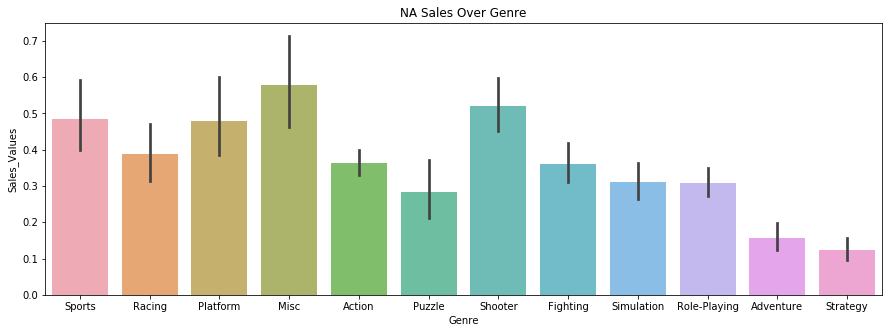

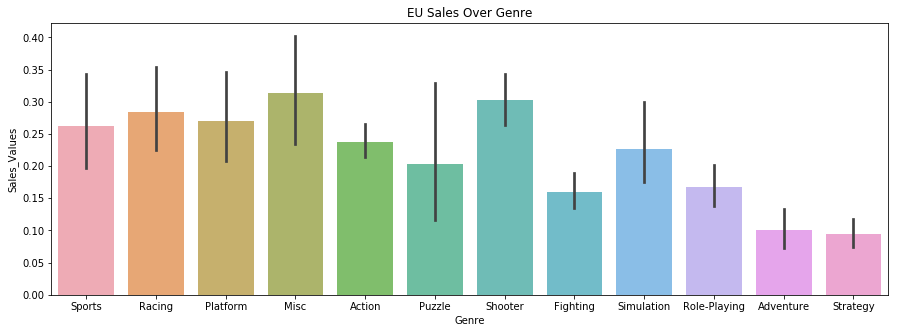

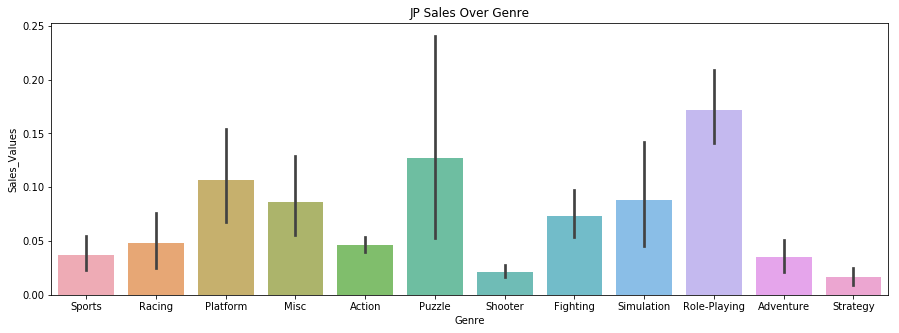

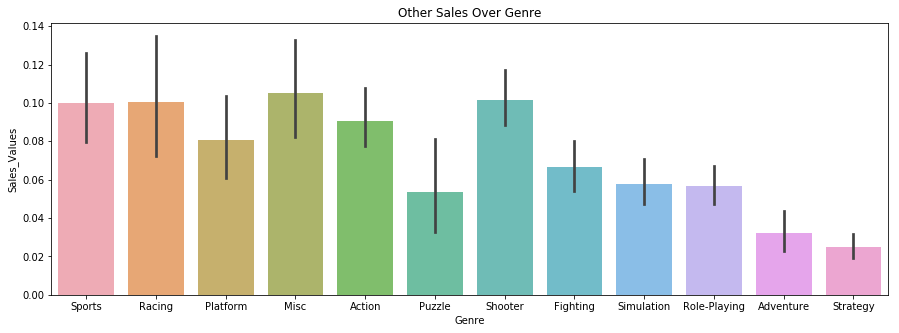

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(df2_NA.Genre, df2_NA.Sales_Values, alpha = 0.8)
plt.title("NA Sales Over Genre")
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(df2_EU.Genre, df2_EU.Sales_Values, alpha = 0.8)
plt.title("EU Sales Over Genre")
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(df2_JP.Genre, df2_JP.Sales_Values, alpha = 0.8)
plt.title("JP Sales Over Genre")
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(df2_Other.Genre, df2_Other.Sales_Values, alpha = 0.8)
plt.title("Other Sales Over Genre")
plt.show()

Another display of the same thing:

<Figure size 720x720 with 0 Axes>

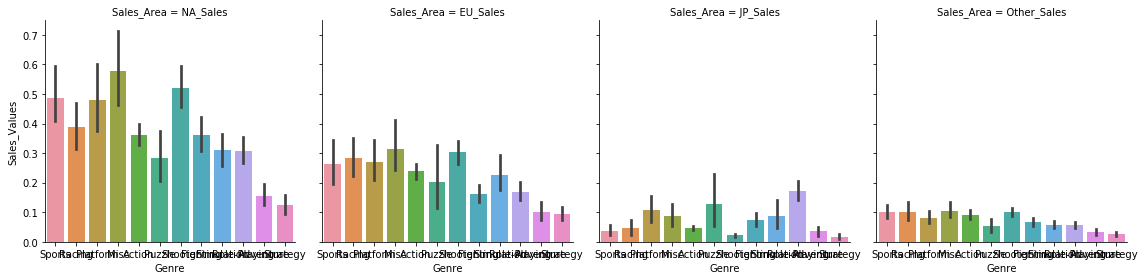

In [81]:
plt.figure(figsize=(10,10))
sns.factorplot("Genre", "Sales_Values", col="Sales_Area", data=df2_GenreSales, kind="bar")

When it comes to the distribution of sales of different regions over genre, there are some similarities as well as differences. From the barplot, we can see that in all regions, the genre of Strategy has the lowest sales. However, the genres with highest sales are different across different regions. For example, while Misc genre has the highest sales in most regions, Role-Playing genre has the highest sales in Japan.

<Figure size 1080x360 with 0 Axes>

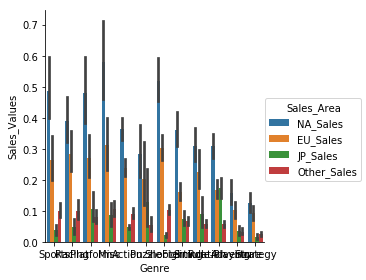

In [72]:
plt.figure(figsize=(15,5))
sns.factorplot(x='Genre', y='Sales_Values', hue='Sales_Area', data=df2_GenreSales, kind='bar')

### 6. Genre over the years

In [90]:
df2.groupby(['Year_of_Release','Genre']).count()

Name  Platform  Publisher  NA_Sales  EU_Sales  \
Year_of_Release Genre                                                         
1985.0          Simulation       1         1          1         1         1   
1988.0          Simulation       1         1          1         1         1   
1992.0          Shooter          1         1          1         1         1   
1994.0          Fighting         1         1          1         1         1   
1996.0          Action           3         3          3         3         3   
                Fighting         1         1          1         1         1   
                Misc             1         1          1         1         1   
                Puzzle           1         1          1         1         1   
                Role-Playing     1         1          1         1         1   
1997.0          Action           1         1          1         1         1   
                Fighting         1         1          1         1         1   
                Platform         2         2          2         2         2   
                Racing           1         1          1         1         1   
                Role-Playing     4         4          4         4         4   
                Shooter          2         2          2         2         2   
                Simulation       2         2          2         2         2   
1998.0          Action           3         3          3         3         3   
                Adventure        1         1          1         1         1   
                Fighting         4         4          4         4         4   
                Platform         3         3          3         3         3   
                Puzzle           1         1          1         1         1   
                Role-Playing     7         7          7         7         7   
                Shooter          2         2          2         2         2   
                Sports           1         1          1         1         1   
                Strategy         3         3          3         3         3   
1999.0          Action           4         4          4         4         4   
                Adventure        2         2          2         2         2   
                Fighting         2         2          2         2         2   
                Misc             1         1          1         1         1   
                Platform         1         1          1         1         1   
...                            ...       ...        ...       ...       ...   
2014.0          Puzzle           1         1          1         1         1   
                Racing          20        20         20        20        20   
                Role-Playing    47        47         47        47        47   
                Shooter         31        31         31        31        31   
                Simulation       4         4          4         4         4   
                Sports          31        31         31        31        31   
                Strategy         2         2          2         2         2   
2015.0          Action          74        74         74        74        74   
                Adventure        9         9          9         9         9   
                Fighting        10        10         10        10        10   
                Misc            14        14         14        14        14   
                Platform         8         8          8         8         8   
                Puzzle           3         3          3         3         3   
                Racing          10        10         10        10        10   
                Role-Playing    28        28         28        28        28   
                Shooter         18        18         18        18        18   
                Simulation       6         6          6         6         6   
                Sports          25        25         25        25        25   
 